# Phylogenetics 계통분류학

In [1]:
from Bio import Phylo

Tree(rooted=False, weight=1.0)
    Clade()
        Clade(name='A')
        Clade(name='B')
        Clade()
            Clade(name='C')
            Clade(name='D')


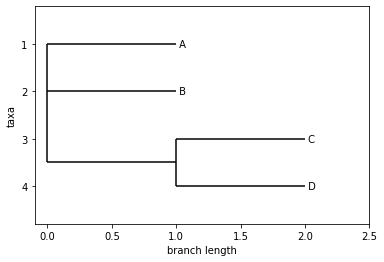

In [2]:
tree = Phylo.read("data/sample_tree.nwk","newick")
print(tree)
Phylo.draw(tree)

Tree(rooted=True, weight=1.0)
    Clade()
        Clade(name='A')
        Clade(name='B')
        Clade()
            Clade(name='C')
            Clade(name='D')
tree.clade[0]: B
tree.clade[1]: B
tree.clade[2,0]: C
tree.clade[2,1]: D


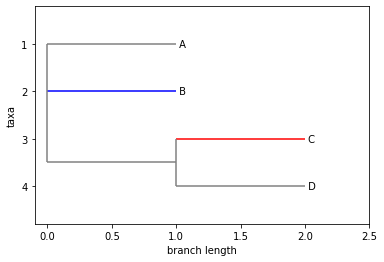

In [3]:
tree = Phylo.read("data/sample_tree.nwk","newick")

tree.rooted = True
tree.root.color = (128,128,128)
print(tree)
print("tree.clade[0]:", tree.clade[1])
print("tree.clade[1]:", tree.clade[1])
print("tree.clade[2,0]:", tree.clade[2,0])
print("tree.clade[2,1]:", tree.clade[2,1])
tree.clade[1].color = "blue"
tree.clade[2,0].color = "red"
Phylo.draw(tree)

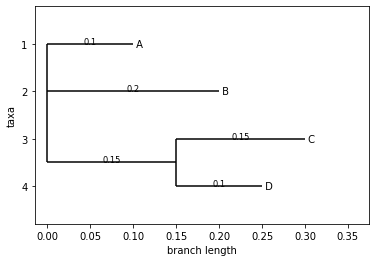

In [4]:
tree = Phylo.read("data/sample_tree4.nwk","newick")
Phylo.draw(tree, branch_labels = lambda c: c.branch_length)

# KEGG (Kyoto Encyclopedia of Genes and Genomics)

* 생물학적 대사 경로와 기능적 유전자 DB
* 유전체와 유전자 정보 DB
* 화학물질과 효소 DB
* 질병, 약물, 환경 정보 DB

```
glycolysis (당 분해) 대사 경로는 10개의 효소가 작용하여 최종적으로 포도당에서 pyruvate와 2개의 ATP를 얻는다.
여기서는 그 마지막 효소인 pyruvate kinase 파일을 사용한다.
http://rest.kegg.jp/get/ec:2.7.1.40
```

In [5]:
from Bio.KEGG import Enzyme
from Bio.KEGG import REST

In [6]:
records = Enzyme.parse(open("data/ec_2.7.1.40.txt"))
record = list(records)[0]
print("classname:", record.classname)
print("sysname:", record.sysname)
print("subtrate:", record.substrate)
print("product:", record.product)

classname: ['Transferases;', 'Transferring phosphorus-containing groups;', 'Phosphotransferases with an alcohol group as acceptor']
sysname: ['ATP:pyruvate 2-O-phosphotransferase']
subtrate: ['ATP [CPD:C00002]', 'pyruvate [CPD:C00022]']
product: ['ADP [CPD:C00008]', 'phosphoenolpyruvate [CPD:C00074]']


```
REST 모듈은 KEGG 데이터베이스 목록을 읽고 데이터를 가져온다.
다음은 (1) 인간의 인슐린 관련 대사 경로를 얻은 후, (2) 대사 경로 데이터에서 유전자 부분만 리스트에 담는 코드이다.
```

In [7]:
human_pathways = REST.kegg_list("pathway", "hsa").read()


# (1) 인간의 인슐린 관련 대사 경로 얻기

insulin_pathways = []
for line in human_pathways.rstrip().split("\n"):
    entry, description = line.split("\t")
    if "insulin" in description.lower():
        insulin_pathways.append(entry)
        print(entry, description)
print(insulin_pathways)
print('')


# (2) 대사 경로 데이터에서 유전자 부분만 추출

insulin_genes = []
for pathway in insulin_pathways:
    pathway_file = REST.kegg_get(pathway).read()
    
    current_section = None
    for line in pathway_file.rstrip().split("\n"):
        section = line[:12].strip()
        if not section == "":
            current_section = section
            
            if current_section == "GENE":
                gene_identifiers, gene_description = line[12:].split("; ")
                gene_id, gene_symbol = gene_identifiers.split()
                
                if not gene_symbol in insulin_genes:
                    insulin_genes.append(gene_symbol)
                    
print("There are %d insulin pathways and %d insulin genes. The genes are:" % (len(insulin_pathways), len(insulin_genes)))
print(", ".join(insulin_genes))

path:hsa04910 Insulin signaling pathway - Homo sapiens (human)
path:hsa04911 Insulin secretion - Homo sapiens (human)
path:hsa04931 Insulin resistance - Homo sapiens (human)
['path:hsa04910', 'path:hsa04911', 'path:hsa04931']

There are 3 insulin pathways and 2 insulin genes. The genes are:
INS, SLC2A1
